# Early Insights - Land Use Analysis

This notebook contains an analysis of the land use attribute in the property assessment dataset. 

The earliest data is from 2004 and the latest data is from 2024. The data in this analysis is in 5 year intervals for the purpose of looking at general trends to determine if this analysis is a good path to continue down. If it is decided that we should continue this analysis, the data from all the other years can be included easily. 

**Note:** There is no data available for 2014, so data from 2015 was chosen, as it had more data points than 2013.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_89875/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# grab required data
pa_2004 = pd.read_csv('../data/property_assessment_2004.csv')[['PID', 'LU']]
pa_2009 = pd.read_csv('../data/property_assessment_2009.csv')[['PID', 'LU']]
pa_2015 = pd.read_csv('../data/property_assessment_2015.csv')[['PID', 'LU']]
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv')[['PID', 'LU']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv')[['PID', 'LU']]

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_89875/2029388155.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2004 = pd.read_csv('../data/property_assessment_2004.csv')[['PID', 'LU']]
/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_89875/2029388155.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2009 = pd.read_csv('../data/property_assessment_2009.csv')[['PID', 'LU']]
/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_89875/2029388155.py:5: DtypeWarning: Columns (16,61) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2019 = pd.read_csv('../data/property_assessment_2019.csv')[['PID', 'LU']]
/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_89875/2029388155.py:6: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2024 = pd.read_csv('../

## Number of Units of all Land Usage Types Over 20 Years

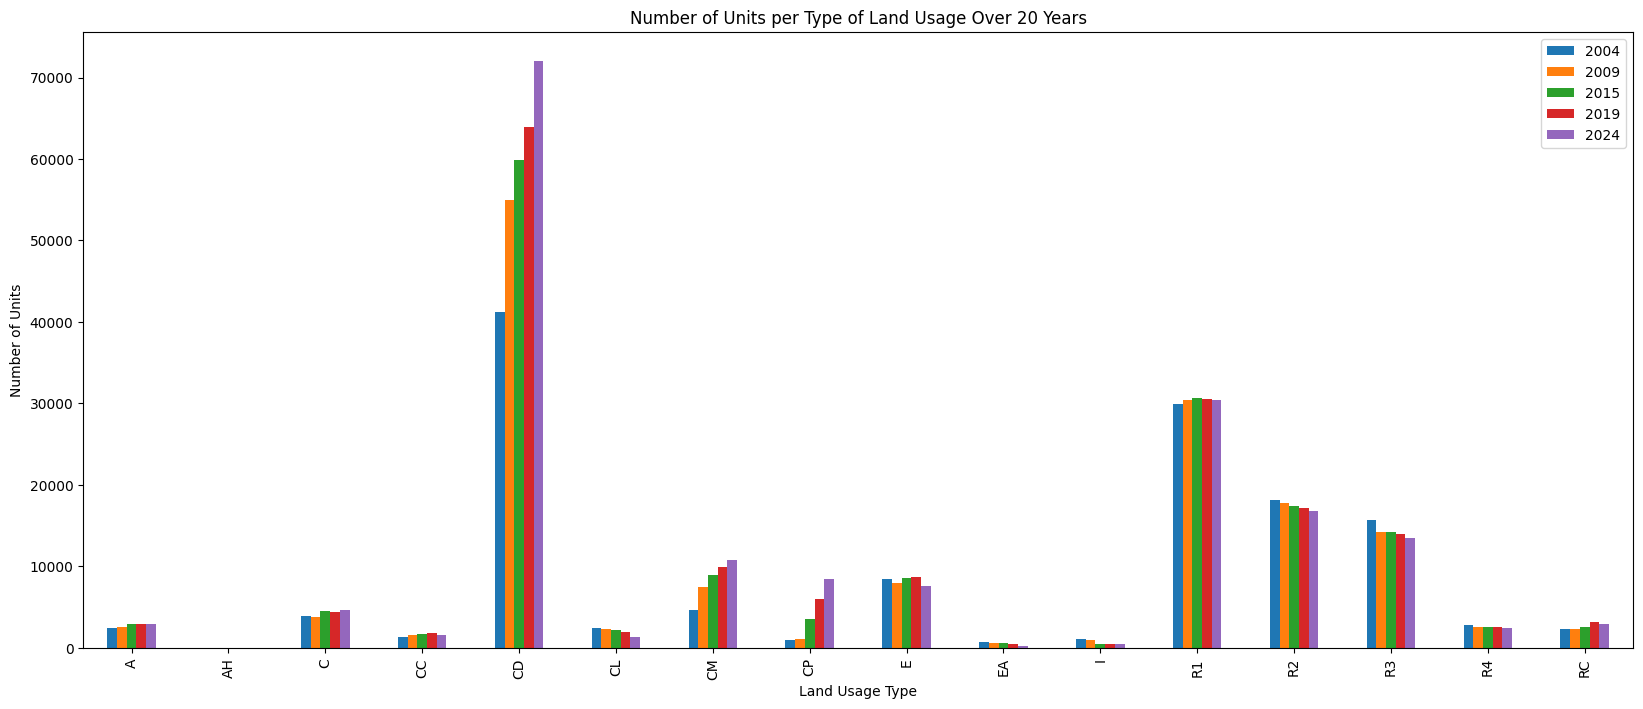

In [3]:
# count the number of buildings per type of land usage for each year
group_04 = pa_2004.groupby('LU').count().rename(columns={'PID': '2004'})
group_09 = pa_2009.groupby('LU').count().rename(columns={'PID': '2009'})
group_15 = pa_2015.groupby('LU').count().rename(columns={'PID': '2015'})
group_19 = pa_2019.groupby('LU').count().rename(columns={'PID': '2019'})
group_24 = pa_2024.groupby('LU').count().rename(columns={'PID': '2024'})

# merge all 5 years into one data frame
temp = pd.merge(group_04, group_09, on='LU')
temp = pd.merge(temp, group_15, on='LU')
temp = pd.merge(temp, group_19, on='LU')
data_frame = pd.merge(temp, group_24, on='LU')

# plot the data as a bar chart
data_frame.plot(kind='bar', figsize=(20,8))
plt.title('Number of Units per Type of Land Usage Over 20 Years')
plt.ylabel('Number of Units')
plt.xlabel('Land Usage Type');


### Land Usage Code Key

| Code | Type |
|------|-----------|
| A    | Residental (7 or more Units) |
| AH   | Agricultural/Horticultural |
| C    | Commercial |
| CC   | Commercial Condomonium |
| CD   | Residental Condomonium Unit | 
| CL   | Commercial Land | 
| CM   | Condomonium Building (excluding units) |
| CP   | Condomonium Parking | 
| E    | Tax Exempt |
| EA   | Tax Exempt (121A) |
| I    | Industrial |
| R1   | Residental One-Family Home |
| R2   | Residental Two-Family Home |
| R3   | Residental Three-Family Home |
| R4   | Residental Four-Family Home |
| RC   | Mixed Use (Residental and Commercial) |

##### Here we can see that there are clear trends both upwards and downwards for several of the different land usage types. For the sake of this project, it may be in our best interest to dive deeper into the trends of residental multifamily homes (R1, R2, R3, and R4) to see how their numbers increase or decrease, as well as see how many if any of those units are being converted from mutlifamily homes to single family or visa versa. Additionally, it may be worth looking into the dramatic increase in the number of residental condomonium buildings in relation to other aspects of the data for example, zip code to determine which parts of the city are building these condomoniums, building value to determine the economic class of people living in these new buildings, or unit size to name a few options.

## Number of Single-Family and Multi-Family Homes Over 20 Years

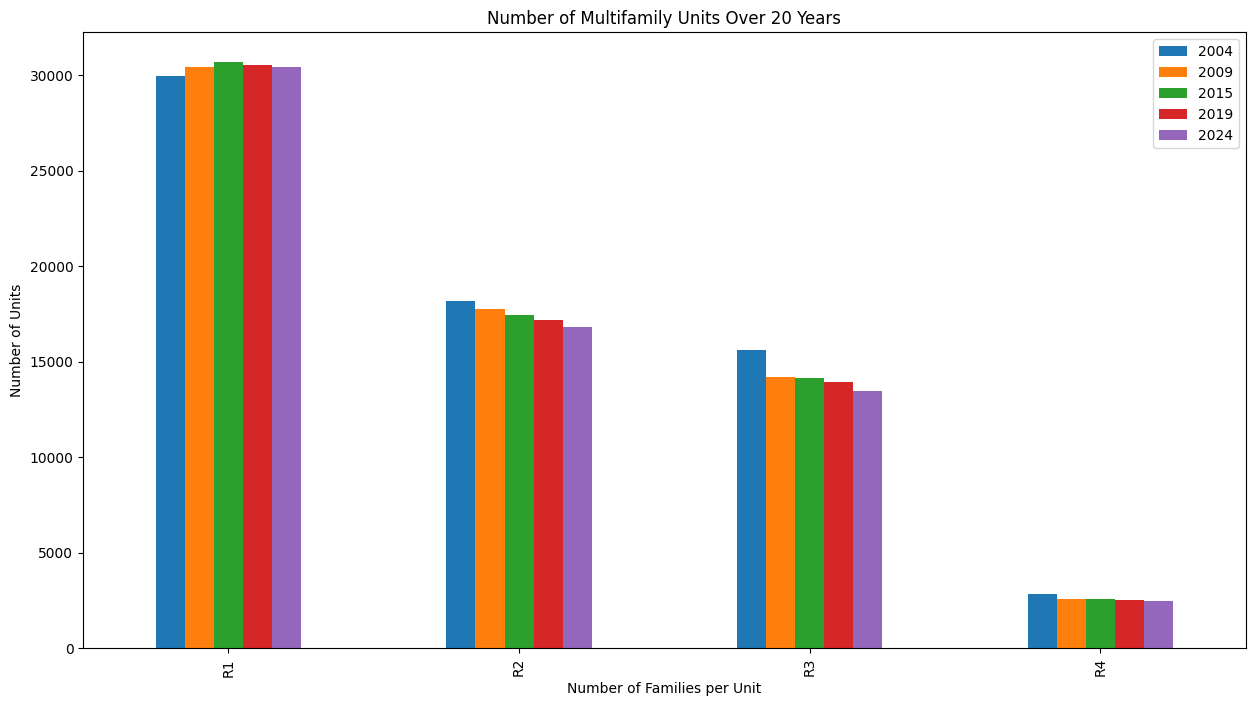

In [4]:
# count the number of multi-family homes for each year
group_04 = pa_2004.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2004'})
group_09 = pa_2009.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2009'})
group_15 = pa_2015.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2015'})
group_19 = pa_2019.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2019'})
group_24 = pa_2024.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2024'})

# merge all 5 years into one data frame
temp = pd.merge(group_04, group_09, on='LU')
temp = pd.merge(temp, group_15, on='LU')
temp = pd.merge(temp, group_19, on='LU')
data_frame = pd.merge(temp, group_24, on='LU')

# plot data as a bar chart
data_frame.plot(kind='bar', figsize=(15,8))
plt.title('Number of Multifamily Units Over 20 Years')
plt.ylabel('Number of Units')
plt.xlabel('Number of Families per Unit');


##### Here we take a closer look into the single and multifamily homes in particular. We can see that two-family homes (R2) and three-family homes (R3) steadily decrease in number but the single-family homes (R1) do not seem to be increasing at a rate proportional to the two and three-family homes' decrease. This suggests that the decrease in the number of multifamily homes may not be the result of converting them into single family homes and raises the question what is the reason for this decrease.

## Stacked Area Plot of Single-Family and Multi-Family Units Over 20 Years

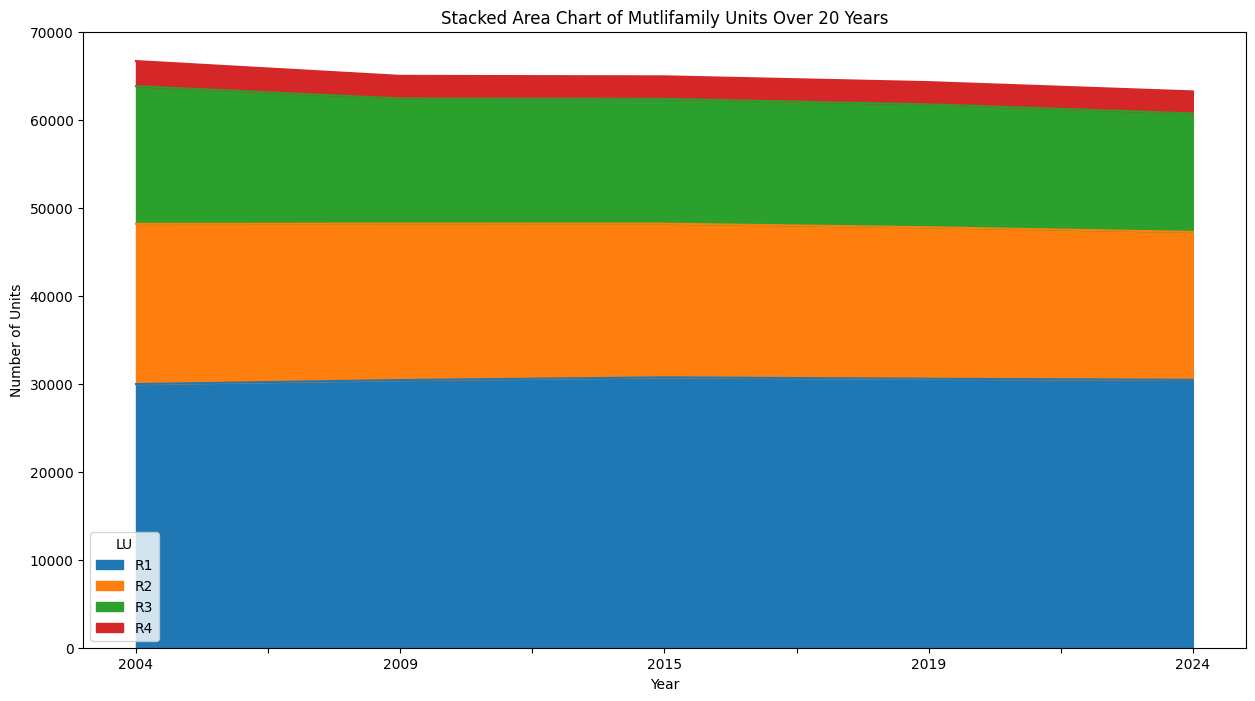

In [5]:
# Assuming housing_data is a 2D numpy array where rows represent years and columns represent counts of different dwelling types

# count the number of multi-family homes for each year
group_04 = pa_2004.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2004'})
group_09 = pa_2009.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2009'})
group_15 = pa_2015.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2015'})
group_19 = pa_2019.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2019'})
group_24 = pa_2024.groupby('LU').count().transpose()[['R1','R2', 'R3', 'R4']].transpose().rename(columns={'PID': '2024'})

# merge all 5 years into one data frame
temp = pd.merge(group_04, group_09, on='LU')
temp = pd.merge(temp, group_15, on='LU')
temp = pd.merge(temp, group_19, on='LU')
data_frame = pd.merge(temp, group_24, on='LU').transpose()

# Create the stacked area chart
data_frame.plot(kind="area", figsize=(15,8))
plt.xlabel('Year')
plt.ylabel('Number of Units')
plt.title('Stacked Area Chart of Mutlifamily Units Over 20 Years');

##### Here we have an area chart of all the single family and multifamily dwellings over 20 years. We can see that the total number of units is decreasing slightly which could suggest that that two and three family homes are either being converted to a different type of residence, for example residental buildings with 7 or more units, or commercial units or perhaps the buildings have been demolished. A potential next step for this analysis is to start with all the unique IDs of the single and multifamily homes and rather than compare the total number throughout the years, see if those units still exist with different land usage types.